In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [4]:
file_path = 'train_images'

In [5]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths

['train_images\\benign\\melanoma_0.jpg',
 'train_images\\benign\\melanoma_1.jpg',
 'train_images\\benign\\melanoma_10.jpg',
 'train_images\\benign\\melanoma_100.jpg',
 'train_images\\benign\\melanoma_1000.jpg',
 'train_images\\benign\\melanoma_1001.jpg',
 'train_images\\benign\\melanoma_1002.jpg',
 'train_images\\benign\\melanoma_1003.jpg',
 'train_images\\benign\\melanoma_1004.jpg',
 'train_images\\benign\\melanoma_1005.jpg',
 'train_images\\benign\\melanoma_1006.jpg',
 'train_images\\benign\\melanoma_1007.jpg',
 'train_images\\benign\\melanoma_1008.jpg',
 'train_images\\benign\\melanoma_1009.jpg',
 'train_images\\benign\\melanoma_101.jpg',
 'train_images\\benign\\melanoma_1010.jpg',
 'train_images\\benign\\melanoma_1011.jpg',
 'train_images\\benign\\melanoma_1012.jpg',
 'train_images\\benign\\melanoma_1013.jpg',
 'train_images\\benign\\melanoma_1014.jpg',
 'train_images\\benign\\melanoma_1015.jpg',
 'train_images\\benign\\melanoma_1016.jpg',
 'train_images\\benign\\melanoma_1017.jpg'

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [9]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,train_images\benign\melanoma_2526.jpg,benign
1,train_images\benign\melanoma_2118.jpg,benign
2,train_images\malignant\melanoma_6860.jpg,malignant
3,train_images\benign\melanoma_3382.jpg,benign
4,train_images\benign\melanoma_2246.jpg,benign


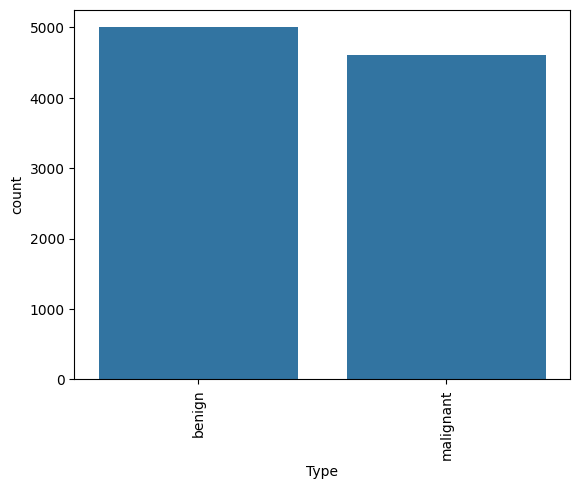

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [14]:
#train, test = train_test_split(data, test_size=0.30, random_state=42)

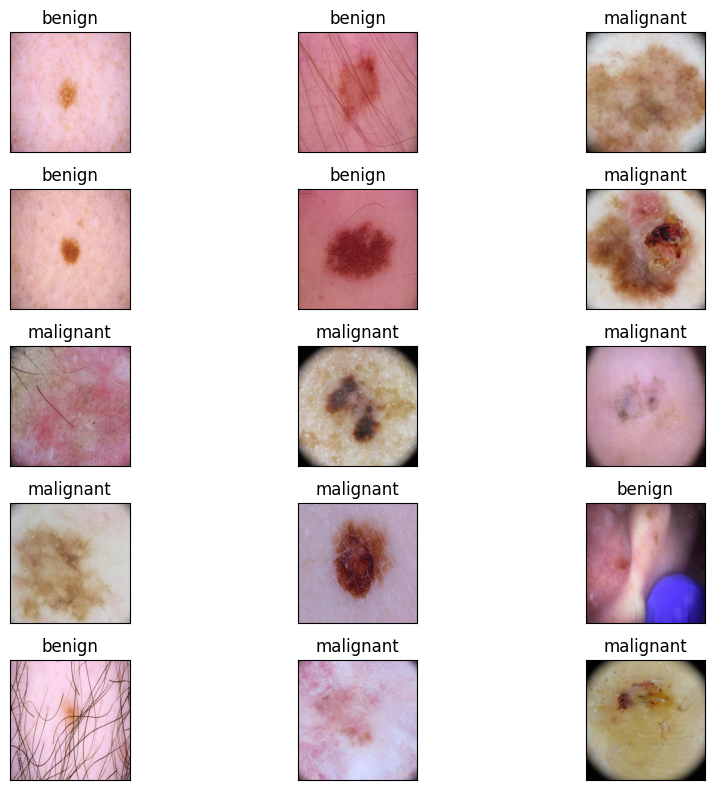

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [22]:
train_data_folder = 'train_images'
test_data_folder = 'test_images'

In [19]:
def create_dataframe_from_folder(folder_path):
    filepaths = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                filepath = os.path.join(label_path, filename)
                filepaths.append(filepath)
                labels.append(label)
    return pd.DataFrame({'Filepath': filepaths, 'Label': labels})

In [23]:
train_data = create_dataframe_from_folder(train_data_folder)
test_data = create_dataframe_from_folder(test_data_folder)

In [24]:

test_data_folder = 'test_images'

train_gen = train_datagen.flow_from_dataframe(
    #file_path,
    dataframe=train_data,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    #test_data_folder,
    dataframe=test_data,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    #test_data_folder,
    dataframe=test_data,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 9605 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [25]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [26]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [29]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100,
    callbacks=[my_callbacks]
)

Epoch 1/100
301/301 [==============================] - 372s 1s/step - loss: 0.2579 - accuracy: 0.8912 - val_loss: 0.2328 - val_accuracy: 0.9050
Epoch 2/100
301/301 [==============================] - 295s 980ms/step - loss: 0.1882 - accuracy: 0.9233 - val_loss: 0.2054 - val_accuracy: 0.9160
Epoch 3/100
301/301 [==============================] - 299s 994ms/step - loss: 0.1725 - accuracy: 0.9283 - val_loss: 0.2155 - val_accuracy: 0.9130
Epoch 4/100
301/301 [==============================] - 305s 1s/step - loss: 0.1506 - accuracy: 0.9419 - val_loss: 0.2252 - val_accuracy: 0.9100


In [30]:
model.save("model_resnet50.h5")

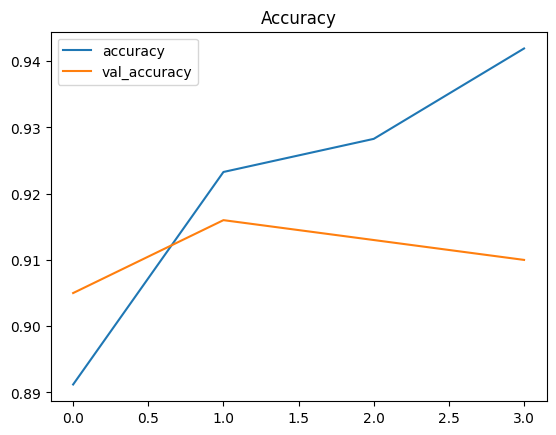

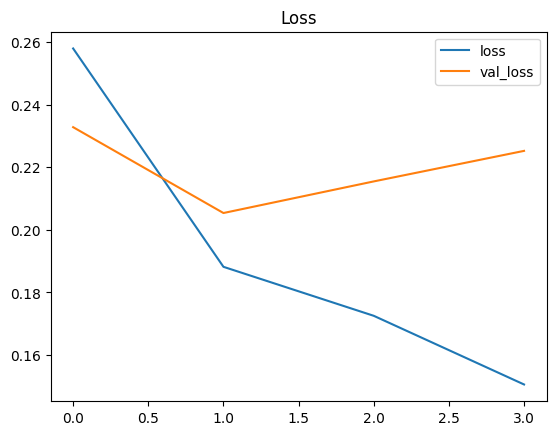

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [32]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.22523
Test Accuracy: 91.00%


In [33]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [34]:
y_test = list(test_data.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.88      0.95      0.91       500
   malignant       0.94      0.87      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



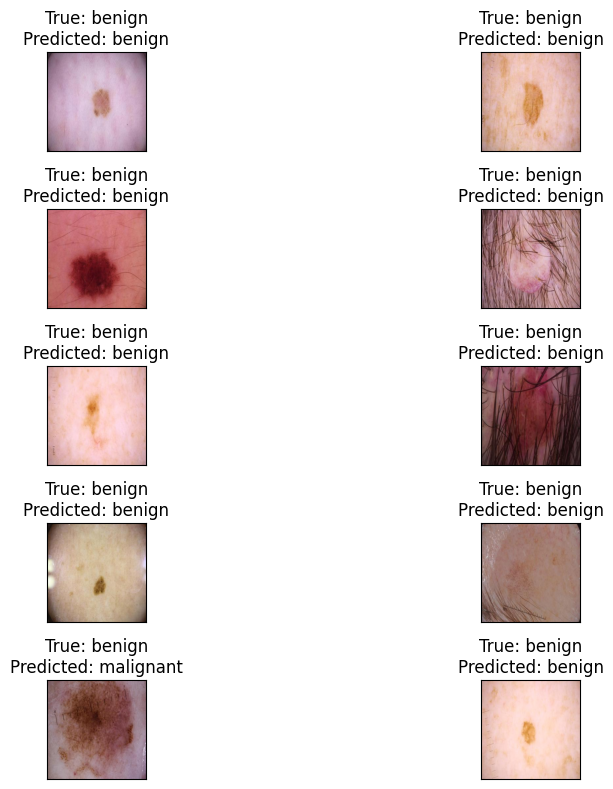

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_data.Filepath.iloc[i]))
    ax.set_title(f"True: {test_data.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()